In [1]:
# No ds_titanic_eda.ipynb

# Importação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Carregamento do Dataset
df = sns.load_dataset('titanic')

# Verificação inicial
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# O caminho agora aponta para a subpasta 'data'
file_path = '../data/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Analisar tipos de dados e memória
print("Informações do DataFrame:")
df.info()

# Estatísticas Sumárias das Variáveis Numéricas
print("\nEstatísticas Sumárias:")
df.describe(include='all')

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Estatísticas Sumárias:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


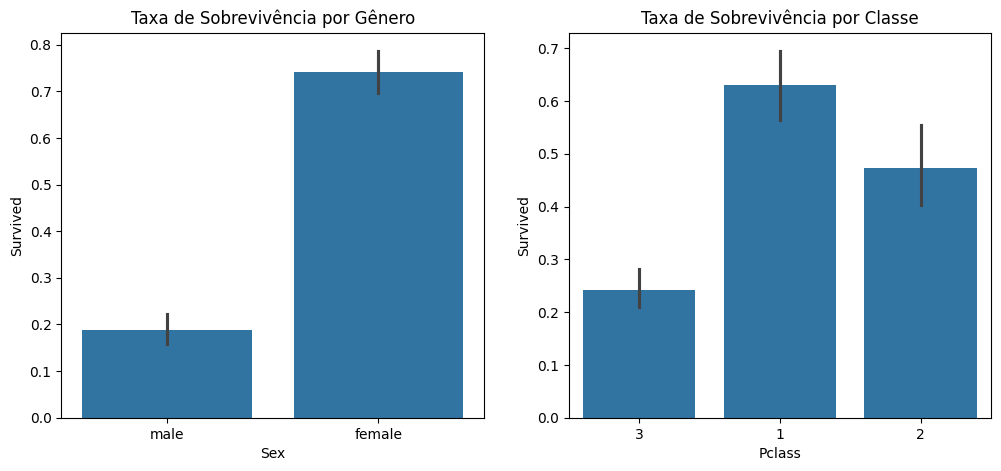

In [36]:
import os
if not os.path.exists('plots'):
    os.makedirs('plots')
    
# --- Sobrevivência por Gênero e Classe de Bilhete ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Taxa de Sobrevivência por Gênero')

plt.subplot(1, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Taxa de Sobrevivência por Classe')

# SALVA a imagem na pasta 'plots/'
plt.savefig('plots/survival_rate_sex_pclass.png') 
plt.show()
# Insight gerado: Mulheres e passageiros da 1ª classe tiveram a maior taxa de sobrevivência.

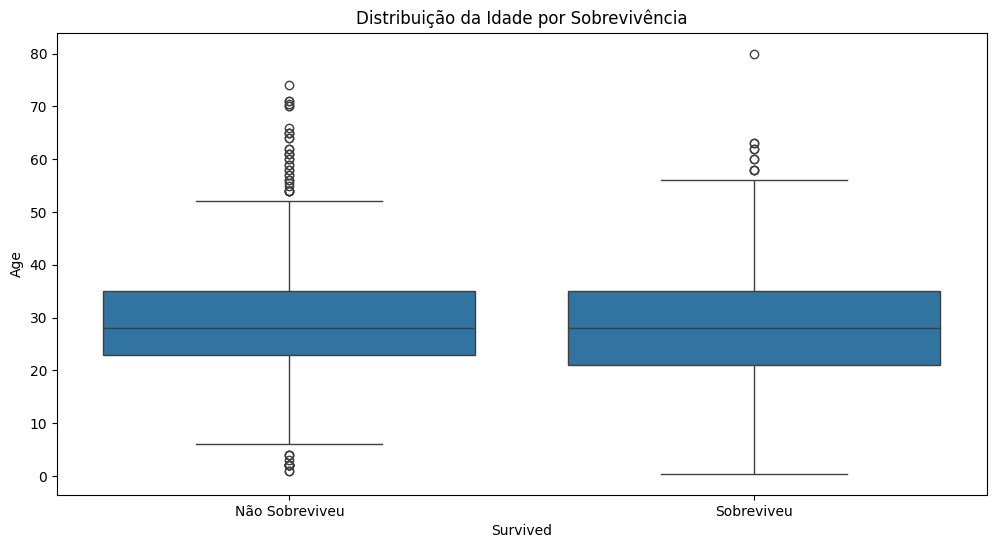

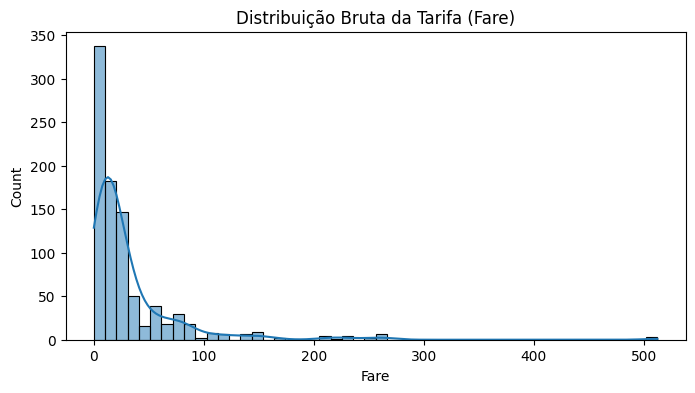

In [35]:
# Nota: Como Age foi imputada, o boxplot mostrará a distribuição com a mediana preenchida.

if not os.path.exists('plots'):
    os.makedirs('plots')
    
plt.figure(figsize=(12, 6))
# Boxplot da Idade vs. Sobrevivência
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Distribuição da Idade por Sobrevivência')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
# SALVA a imagem na pasta 'plots/'
plt.savefig('plots/age_distribution_boxplot.png')
plt.show()

# (Opcional, mas útil) Gráfico da distribuição da Tarifa (Fare) para ver a assimetria antes da transformação log
plt.figure(figsize=(8, 4))
sns.histplot(df['Fare'], kde=True, bins=50)
plt.title('Distribuição Bruta da Tarifa (Fare)')
plt.savefig('plots/fare_distribution_histogram.png')
plt.show()

In [13]:
# 1. Calcular a Moda
most_frequent_embarked = df['Embarked'].mode()[0]

# 2. Atribuição direta para preencher os valores nulos
# O .fillna() cria a Série com os valores preenchidos e atribuímos de volta à coluna.
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)

# Verificação (opcional, mas recomendado)
print("Nulos em Embarked após imputação:", df['Embarked'].isnull().sum())

Nulos em Embarked após imputação: 0


In [15]:
# Imputação da Mediana
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
print("Nulos em Age após imputação:", df['Age'].isnull().sum())

Nulos em Age após imputação: 0


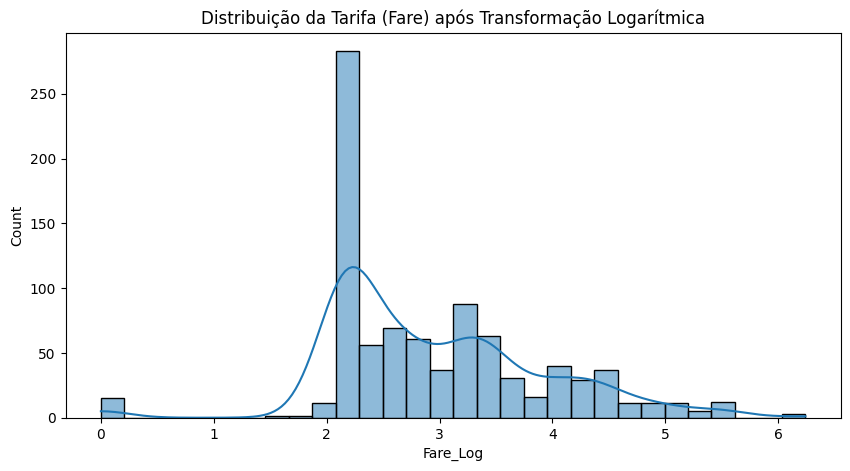

In [17]:
# No entanto, no dataset Titanic do Kaggle, geralmente há apenas um nulo que deve ser tratado antes.
# Vamos tratar o nulo primeiro (se houver algum nulo na tarifa, imputamos a mediana).
if df['Fare'].isnull().sum() > 0:
    df['Fare'].fillna(df['Fare'].median())

# 1. Aplicar Transformação Logarítmica
# Usamos log1p (log(1+x)) para suavizar a assimetria e lidar com o valor zero, se existir.
df['Fare_Log'] = np.log1p(df['Fare'])

# 2. Visualização para confirmar a normalização (opcional no código, mas bom para análise)
plt.figure(figsize=(10, 5))
sns.histplot(df['Fare_Log'], kde=True, bins=30)
plt.title('Distribuição da Tarifa (Fare) após Transformação Logarítmica')
plt.show()

In [19]:
# Cria 1 se houver um valor em Cabin, e 0 se for nulo (NaN)
df['Has_Cabin'] = np.where(df['Cabin'].notnull(), 1, 0)

# Análise de sobrevivência pela nova feature
print("\nTaxa de Sobrevivência (Has_Cabin):")
print(df.groupby('Has_Cabin')['Survived'].mean())
# Insight: Quem tinha cabine (1) teve chance de sobrevivência muito maior.


Taxa de Sobrevivência (Has_Cabin):
Has_Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


In [22]:
# 1. FamilySize: Soma de SibSp e Parch
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 inclui o próprio passageiro

# 2. IsAlone: Se FamilySize é 1, então 1 (sozinho); caso contrário, 0.
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

# Análise de sobrevivência para IsAlone
print("\nTaxa de Sobrevivência (IsAlone):")
print(df.groupby('IsAlone')['Survived'].mean())
# Insight: Pessoas que viajavam sozinhas (1) tiveram chance de sobrevivência menor.


Taxa de Sobrevivência (IsAlone):
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


In [23]:
# Função para extrair o Título
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Agrupamento e Limpeza (muitos títulos raros prejudicam o modelo)
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Análise de sobrevivência pelos Títulos (após limpeza)
print("\nTaxa de Sobrevivência por Título:")
print(df.groupby('Title')['Survived'].mean().sort_values(ascending=False))


Taxa de Sobrevivência por Título:
Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.347826
Mr        0.156673
Name: Survived, dtype: float64


In [24]:
# 1. Definir as colunas categóricas para OHE
categorical_cols = ['Sex', 'Embarked', 'Title']

# Pclass é numérica, mas queremos tratá-la como categórica
# Vamos convertê-la para string antes da codificação
df['Pclass'] = df['Pclass'].astype(str)
categorical_cols.append('Pclass')


# 2. Aplicar One-Hot Encoding
# drop_first=True evita a multicolinearidade, removendo a primeira categoria de cada nova feature.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Novas colunas após OHE:")
print(df_encoded.columns)

Novas colunas após OHE:
Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Fare_Log', 'Has_Cabin', 'FamilySize', 'IsAlone',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Pclass_2', 'Pclass_3'],
      dtype='object')


In [26]:
# Colunas a serem removidas:
# 1. Identificadores: PassengerId, Ticket
# 2. Colunas originais substituídas por novas features: Name, Cabin, Fare, SibSp, Parch, fare
# 3. Colunas que não serão mais usadas (a versão categórica original)
cols_to_drop = [
    'PassengerId', 'Ticket', 'Name', 
    'Cabin', 'SibSp', 'Parch', 
    'Fare'  # Remove a 'fare' original, mantendo apenas 'Fare_Log'
]

# Remover as colunas
df_model = df_encoded.drop(columns=cols_to_drop)

# Visualizar o DataFrame final pronto para modelagem
print("\nDataFrame final pronto para modelagem (Primeiras 5 linhas):")
df_model.head()
print(f"\nShape final do DataFrame: {df_model.shape}")


DataFrame final pronto para modelagem (Primeiras 5 linhas):

Shape final do DataFrame: (891, 15)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Separar Features (X) e Target (y)
# 'Survived' é o nosso target
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

# 2. Dividir em conjuntos de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nDados separados para Modelagem.")
print(f"Shape do X_train: {X_train.shape}")


Dados separados para Modelagem.
Shape do X_train: (712, 14)


In [28]:
# 1. Instanciar o modelo
log_model = LogisticRegression(solver='liblinear', random_state=42)

# 2. Treinar o modelo
log_model.fit(X_train, y_train)

# 3. Fazer previsões no conjunto de teste
y_pred_log = log_model.predict(X_test)

# 4. Avaliação
print("--- Regressão Logística (Baseline) ---")
print(f"Acurácia (Accuracy): {accuracy_score(y_test, y_pred_log):.4f}")
print("\nRelatório de Classificação (Classification Report):")
print(classification_report(y_test, y_pred_log))

--- Regressão Logística (Baseline) ---
Acurácia (Accuracy): 0.8156

Relatório de Classificação (Classification Report):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [29]:
# 1. Instanciar o modelo
# Usamos n_estimators=100 (100 árvores) para maior robustez
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Treinar o modelo
rf_model.fit(X_train, y_train)

# 3. Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# 4. Avaliação
print("--- Random Forest Classifier ---")
print(f"Acurácia (Accuracy): {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelatório de Classificação (Classification Report):")
print(classification_report(y_test, y_pred_rf))

--- Random Forest Classifier ---
Acurácia (Accuracy): 0.8045

Relatório de Classificação (Classification Report):
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

